We start by pulling the party id and LTV. These figures<b> include </b> refunds and chargebacks!

Now I read in the data to R

In [3]:
data <- read.delim("100k_id_rev.csv")

Summary Statistics on Party_ID. 

In [9]:
length(data[,1])
summary(data[,1])

[1] 100000

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   97040 36320000 51290000 52120000 68830000 90900000 

Note that the the X axis is just the party ID. If Pary ID is related to time, I would expect to more party IDs that have higher numerical values as more people sign up as the time goes on. Not sure why there is a large bump after ~20m.

<div>
    <a href="https://plot.ly/~max.roth/156/" target="_blank" title="" style="display: block; text-align: center;"><img src="https://plot.ly/~max.roth/156.png" alt="" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="max.roth:156" src="https://plot.ly/embed.js" async></script>
</div>

In [6]:
summary(data[,2])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-157.20    2.95    3.95   30.82   38.90 1228.00 

Sending the LTV data to plotly, we won't execute this in the notebook here. Notice most of the transactions are trials. The next biggest bump is being billed for one month. I cut of the few users with LTV over 500 or under -50.

In [2]:
# py <- plotly()
# trace1 <- list(
#   x=filter(data, lifetime_party_revenue<500&lifetime_party_revenue>-50)[,2],
#   type="histogram"
# )
# response <- py$plotly(trace1, kwargs=list(filename="line-scatter", fileopt="overwrite"))
# url <- response$url

<div>
    <a href="https://plot.ly/~max.roth/131/" target="_blank" title="Histogram of  LTV" style="display: block; text-align: center;"><img src="https://plot.ly/~max.roth/131.png" alt="Histogram of  LTV" style="max-width: 100%;width: 1022px;"  width="1022" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="max.roth:131" src="https://plot.ly/embed.js" async></script>
</div>

Send to Plotly

In [1]:
#Send to plotly
#py <- plotly()
#trace1 <- list(
#  x=data[,1],
#  y=data[,2],
#  mode = "markers",
#  type="scatter"
#  )
#response <- py$plotly(trace1, kwargs=list(filename="Scatter", fileopt="overwrite"))
#url <- response$url


<div>
    <a href="https://plot.ly/~max.roth/160/" target="_blank" title="" style="display: block; text-align: center;"><img src="https://plot.ly/~max.roth/160.png" alt="" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="max.roth:160" src="https://plot.ly/embed.js" async></script>
</div>

It was hypothesized that there would be a relation between party ID and lifetime revenue. Because IDs are serially assigned, simply because of inflation, party ID would be positively correlated with LTV.

This visualization looks promising that there is no relation between party ID and lifetime revenue. However, let’s group the IDs and see if we can see anything more subtle.

Another thing to notice is a handful of <b> negative LTV <\b> party IDs. Looking into these ID's I found that these are customers who likely called their credit card provider first to dispute the charge, then called us to cancel/get a refund. 

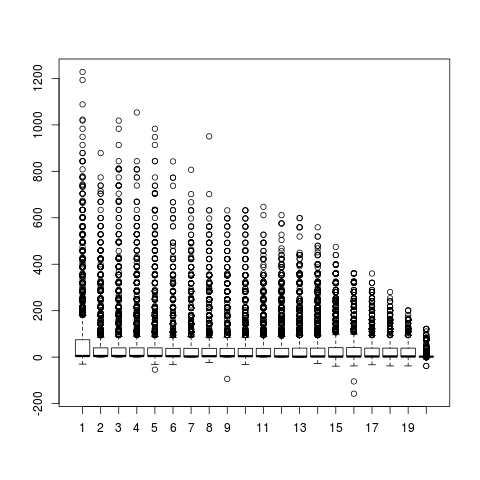

In [4]:
index=as.vector(sapply(1:20,function(x) rep(x,5000)))
dat2=cbind(data[order(data$partyid),],index)
boxplot(lifetime_party_revenue~index,data=dat2)

We still have to zoom in but this tells us that the poeple who signed up a while ago have had the posibility of being billed for longer.

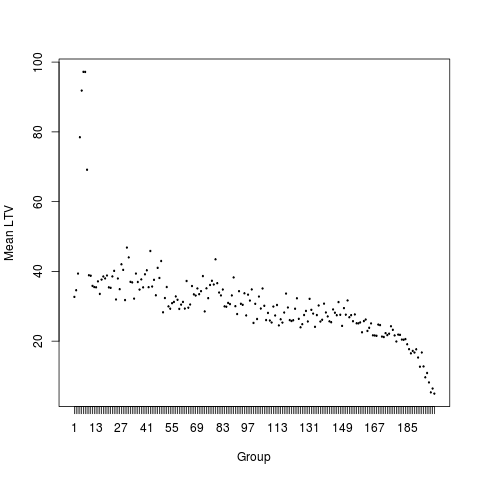

In [5]:
index=as.vector(sapply(1:200,function(x) rep(x,500)))
dat2=cbind(data[order(data$partyid),],as.factor(index))
names(dat2)=c("partyid","rev","group")
x=aggregate(dat2$rev,by=list(dat2$group),FUN=mean)
plot(x[,1],x[,2],xlab="Group",ylab="Mean LTV")

<div>
    <a href="https://plot.ly/~max.roth/181/" target="_blank" title="Grouped IDs V Average LTV" style="display: block; text-align: center;"><img src="https://plot.ly/~max.roth/181.png" alt="Grouped IDs V Average LTV" style="max-width: 100%;"  onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
    <script data-plotly="max.roth:181" src="https://plot.ly/embed.js" async></script>
</div>

This is interesting. It, perhaps, debunks the hypothesis of increasing charges over time.